## Imports

In [147]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Global Variables

In [2]:
project = 'Suthaus_2022'
cell = 'cellCombined'
marker = 'Full18S'
sim = 'sim90'
denoise_method = 'RAD'
raw_data = os.path.join('..', 'raw_data')
tax_assign_results = os.path.join(raw_data, 'tax_assign_results', project, marker, cell, sim, denoise_method)
otu_results = os.path.join(raw_data, 'OTU_results', project)

# Plotting *'Pident'* values

In [3]:
final_tax_table_path = os.path.join(otu_results, f'final_tax_table_{marker}_{sim}.csv')

tax_df = pd.read_csv(final_tax_table_path)

In [4]:
tax_df.head(3)

,OTU,OTU_Num,Reference_ID,Kingdom,Domain,Phyllum,Class,Order,Family,Genus,Species,Pident,Length,Sample
0,seq106_27,1,EF165145.1.1730_U,Eukaryota,Stramenopiles,Ochrophyta,Chrysophyceae,Chrysophyceae_X,Chrysophyceae_CladeB1,Chrysocapsa,Chrysocapsa_wetherbeei,94.5,683,Th38
1,seq150_65,1,EF165145.1.1730_U,Eukaryota,Stramenopiles,Ochrophyta,Chrysophyceae,Chrysophyceae_X,Chrysophyceae_CladeB1,Chrysocapsa,Chrysocapsa_wetherbeei,95.1,884,Th38
2,seq104_29,6,DQ462456.1.1771_U,Eukaryota,Alveolata,Apicomplexa,Gregarinomorphea,Neogregarinorida,Actinocephalidae,Ascogregarina,Ascogregarina_culicis,84.0,1748,Th38


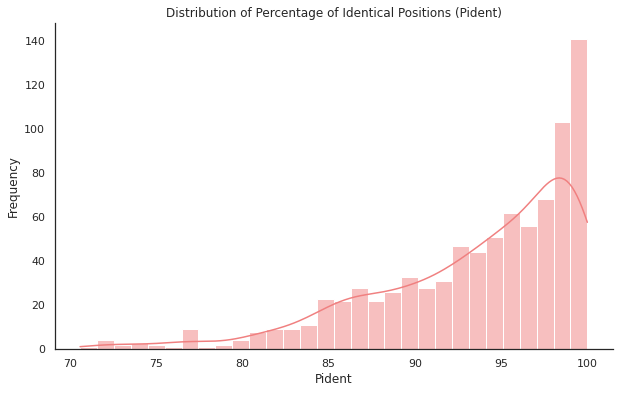

In [74]:
# Set style of seaborn plot
sns.set(style="white")

# Create a histogram
plt.figure(figsize=(10,6))
sns.histplot(tax_df['Pident'], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Percentage of Identical Positions (Pident)')
plt.xlabel('Pident')
plt.ylabel('Frequency')

# Set visibility for spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

# plt.show()

# save path
save_path = os.path.join(otu_results, f'pident_{marker}_{sim}_histogram.png')
# Save the figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')

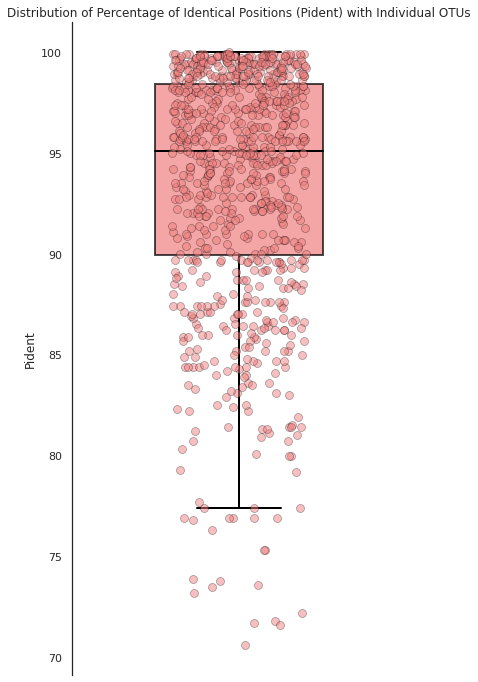

In [69]:
# Set style of seaborn plot
sns.set(style="white")
# darkgrid, whitegrid, dark, white, ticks

# Create a figure and axis
plt.figure(figsize=(6, 12))

# Create a boxplot
sns.boxplot(y=tax_df['Pident'], 
            color='lightcoral', 
            width=0.5, 
            boxprops=dict(alpha=.7, linewidth=2, edgecolor='black'), 
            saturation=1, 
            showfliers=False,
            medianprops = dict(linewidth=2, color='black'),
            whiskerprops = dict(linewidth=2, color='black'),
            capprops = dict(linewidth=2, color='black'))

# Overlay a strip plot on the histogram
sns.stripplot(y=tax_df['Pident'], 
              size=8, 
              color='lightcoral', 
              jitter=0.2, 
              alpha=.5, 
              edgecolor='black', 
              linewidth=0.5)

# Set visibility for spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(True)


# Add title and labels
plt.title('Distribution of Percentage of Identical Positions (Pident) with Individual OTUs')
plt.ylabel('Pident')


# Show the plot
# plt.show()

# save path
save_path = os.path.join(otu_results, f'pident_{marker}_{sim}_boxplot.png')
# Save the figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Plotting sequence length

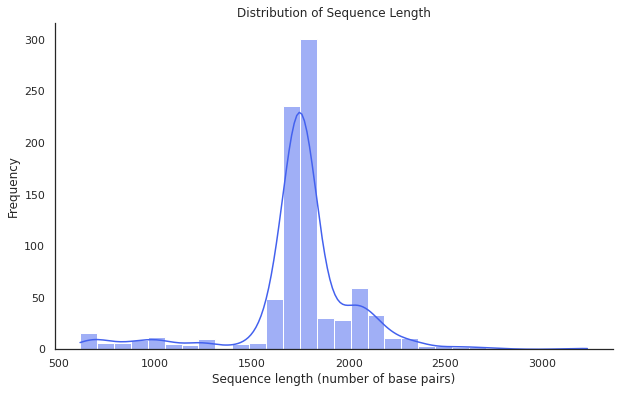

In [85]:
# Set style of seaborn plot
sns.set(style="white")

# Create a histogram
plt.figure(figsize=(10,6))
sns.histplot(tax_df['Length'], bins=30, kde=True, color='#4361EE')
plt.title('Distribution of Sequence Length')
plt.xlabel('Sequence length (number of base pairs)')
plt.ylabel('Frequency')

# Set visibility for spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

# plt.show()

# save path
save_path = os.path.join(otu_results, f'length_{marker}_{sim}_histogram.png')
# Save the figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')

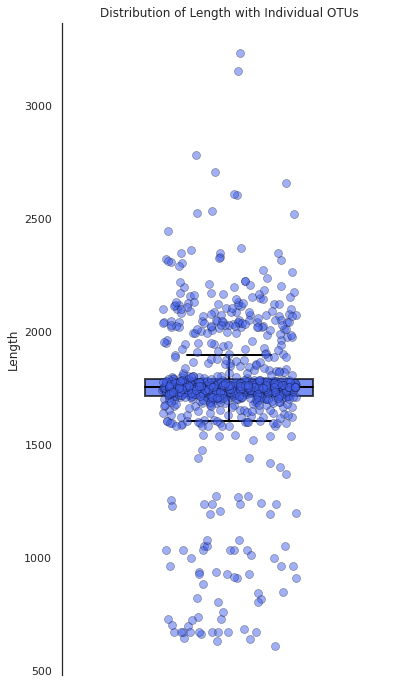

In [89]:
# Set style of seaborn plot
sns.set(style="white")
# darkgrid, whitegrid, dark, white, ticks

# Create a figure and axis
plt.figure(figsize=(6, 12))

# Create a boxplot
sns.boxplot(y=tax_df['Length'], 
            color='#4361EE', 
            width=0.5, 
            boxprops=dict(alpha=.7, linewidth=2, edgecolor='black'), 
            saturation=1, 
            showfliers=False,
            medianprops = dict(linewidth=2, color='black'),
            whiskerprops = dict(linewidth=2, color='black'),
            capprops = dict(linewidth=2, color='black'))

# Overlay a strip plot on the histogram
sns.stripplot(y=tax_df['Length'], 
              size=8, 
              color='#4361EE', 
              jitter=0.2, 
              alpha=.5, 
              edgecolor='black', 
              linewidth=0.5)

# Set visibility for spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(True)


# Add title and labels
plt.title('Distribution of Length with Individual OTUs')
plt.ylabel('Length')


# Show the plot
# plt.show()

# save path
save_path = os.path.join(otu_results, f'length_{marker}_{sim}_boxplot.png')
# Save the figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Exploring the relationship between sequence length and percentage of identical positions (pident)

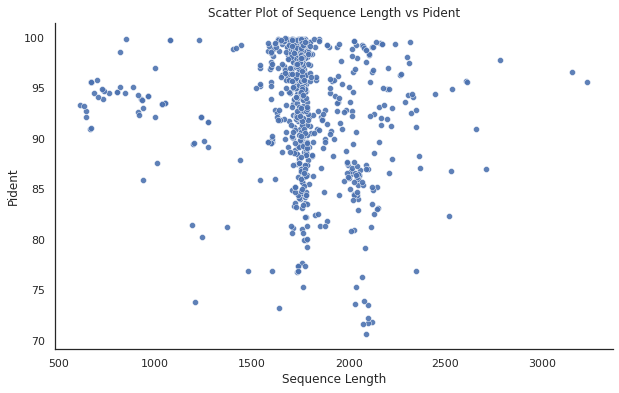

In [122]:
# Set style of seaborn plot
sns.set(style='white')

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x=tax_df['Length'], y=tax_df['Pident'], alpha=0.9)

# Set visibility for spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

# Add title and labels
plt.title('Scatter Plot of Sequence Length vs Pident')
plt.xlabel('Sequence Length')
plt.ylabel('Pident')

# Show the plot
plt.show()


# # save path
# save_path = os.path.join(otu_results, f'length_vs_pident_{marker}_{sim}_boxplot.png')
# # Save the figure
# plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Taxonomic assignment distribution

In [99]:
tax_df.head(3)

,OTU,OTU_Num,Reference_ID,Kingdom,Domain,Phyllum,Class,Order,Family,Genus,Species,Pident,Length,Sample
0,seq106_27,1,EF165145.1.1730_U,Eukaryota,Stramenopiles,Ochrophyta,Chrysophyceae,Chrysophyceae_X,Chrysophyceae_CladeB1,Chrysocapsa,Chrysocapsa_wetherbeei,94.5,683,Th38
1,seq150_65,1,EF165145.1.1730_U,Eukaryota,Stramenopiles,Ochrophyta,Chrysophyceae,Chrysophyceae_X,Chrysophyceae_CladeB1,Chrysocapsa,Chrysocapsa_wetherbeei,95.1,884,Th38
2,seq104_29,6,DQ462456.1.1771_U,Eukaryota,Alveolata,Apicomplexa,Gregarinomorphea,Neogregarinorida,Actinocephalidae,Ascogregarina,Ascogregarina_culicis,84.0,1748,Th38


In [112]:
tax_df['Species'].unique()

array(['Chrysocapsa_wetherbeei', 'Ascogregarina_culicis',
       'Leptophryidae_XX', 'Chrysophyceae_CladeE_X_sp.',
       'DinoGroupIII_XX_sp.', 'Chytridiomycetes_X_sp.',
       'Cognettia_cognetti', 'Psychodiella_sp.', 'Cephalodella_gibba',
       'Bryocamptus_pygmaeus', 'Nannochloropsis_sp.', 'Diderma_niveum',
       'Heterolepidoderma_ocellatum',
       'SpizellomycetalesandRhizophlyctidales_sp.', 'Uroleptus_pisces',
       'Limnofilidae_X_sp.', 'Chrysastrella_breviappendiculata',
       'Dinophyceae_XXX_sp.', 'Plectus_minimus', 'Hemiophrys_procera',
       'Cryptomycotina_XX_sp.', 'Gregarina_tropica', 'Fungi_XXXX_sp.',
       'Stenophora_robusta', 'Paramecium_sp.', 'Chromadorea_XX_sp.',
       'Microthamnion_kuetzingianum', 'Chlamydomonadales_XX_sp.',
       'Cercomonas_sp.', 'Epipyxis_pulchra', 'Gyratrix_hermaphroditus',
       'Microspora_sp.', 'Parietochloris_alveolaris',
       'Tetrahymenida_X_sp.', 'Heterolepidoderma_acidophilum',
       'Cypria_exsculpta', 'Chrysamoeba_mikro

In [113]:
def assign_tax_level(species_name):
    if 'XXXXX' in species_name:
        return 'Domain'
    elif 'XXXX' in species_name:
        return 'Phylum'
    elif 'XXX' in species_name:
        return 'Class'
    elif 'XX' in species_name:
        return 'Order'
    elif 'X' in species_name:
        return 'Family'
    elif '_sp.' in species_name:
        return 'Genus'
    else:
        return 'Species'

In [114]:
# Apply the function to the 'Species' column to create the new 'tax_level' column
tax_df['tax_level'] = tax_df['Species'].apply(assign_tax_level)

In [115]:
tax_df.head()

,OTU,OTU_Num,Reference_ID,Kingdom,Domain,Phyllum,Class,Order,Family,Genus,Species,Pident,Length,Sample,tax_level
0,seq106_27,1,EF165145.1.1730_U,Eukaryota,Stramenopiles,Ochrophyta,Chrysophyceae,Chrysophyceae_X,Chrysophyceae_CladeB1,Chrysocapsa,Chrysocapsa_wetherbeei,94.5,683,Th38,Species
1,seq150_65,1,EF165145.1.1730_U,Eukaryota,Stramenopiles,Ochrophyta,Chrysophyceae,Chrysophyceae_X,Chrysophyceae_CladeB1,Chrysocapsa,Chrysocapsa_wetherbeei,95.1,884,Th38,Species
2,seq104_29,6,DQ462456.1.1771_U,Eukaryota,Alveolata,Apicomplexa,Gregarinomorphea,Neogregarinorida,Actinocephalidae,Ascogregarina,Ascogregarina_culicis,84.0,1748,Th38,Species
3,seq213_14,1,KC511080,Eukaryota,Rhizaria,Cercozoa,Endomyxa,Vampyrellida,Leptophryidae,Leptophryidae_X,Leptophryidae_XX,92.2,641,Th38,Order
4,seq222_12,1,EF165122.1.1785_U,Eukaryota,Stramenopiles,Ochrophyta,Chrysophyceae,Chrysophyceae_X,Chrysophyceae_CladeE,Chrysophyceae_CladeE_X,Chrysophyceae_CladeE_X_sp.,91.0,662,Th38,Family


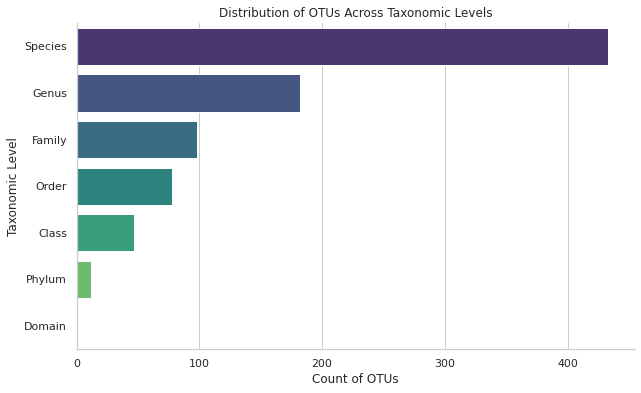

In [120]:
# Set the style of seaborn plot
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a count plot
sns.countplot(data=tax_df, y='tax_level', order=tax_df['tax_level'].value_counts().index, palette="viridis")

# Set visibility for spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

# Add title and labels
plt.title('Distribution of OTUs Across Taxonomic Levels')
plt.xlabel('Count of OTUs')
plt.ylabel('Taxonomic Level')

# Show the plot
# plt.show()


# save path
save_path = os.path.join(otu_results, f'tax_level_dist_{marker}_{sim}.png')
# Save the figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')

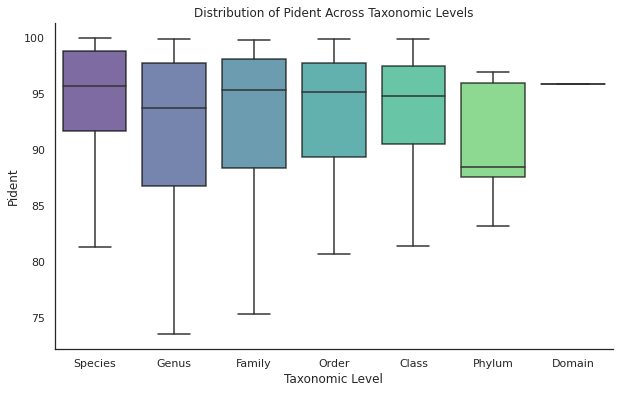

In [138]:
# Set the style of seaborn plot
sns.set(style="white")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a box plot to visualize the distribution of 'pident' at each taxonomic level
sns.boxplot(data=tax_df, 
            x='tax_level', 
            y='Pident', 
            order=tax_df['tax_level'].value_counts().index, 
            palette="viridis", 
            boxprops=dict(alpha=.7, linewidth=1.5, edgecolor='black'), 
            saturation=1, 
            showfliers=False)

# Add title and labels
plt.title('Distribution of Pident Across Taxonomic Levels')
plt.xlabel('Taxonomic Level')
plt.ylabel('Pident')

# Set visibility for spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)


# Show the plot
# plt.show()

# save path
save_path = os.path.join(otu_results, f'pident_across_tax_levels_{marker}_{sim}_boxplots.png')
# Save the figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')

## Using ANOVA

In [141]:
# Group the data by 'tax_level' and select the 'pident' column
grouped_data = [group['Pident'] for name, group in tax_df.groupby('tax_level')]

# Conduct ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Print results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 3.059077287708343
P-value: 0.005749844199767266


## Using Kruskal-Wallis

In [142]:
# Group the data by 'tax_level' and select the 'pident' column
grouped_data = [group['Pident'] for name, group in tax_df.groupby('tax_level')]

# Conduct Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(*grouped_data)

# Print results
print(f"H-statistic: {h_statistic}")
print(f"P-value: {p_value}")

H-statistic: 23.875343424808513
P-value: 0.0005505594187219213


The p-value resulting from either test tells you whether the groups are statistically significantly different from each other.

A small p-value (typically ≤ 0.05) indicates that we can reject the null hypothesis. In the context of these tests, it suggests that **there is a significant difference in 'pident' between at least two of the taxonomic levels**.

## Post-Hoc Tests

### Tukey HSD

In [144]:
# Tukey HSD test
posthoc = pairwise_tukeyhsd(tax_df['Pident'], groups=tax_df['tax_level'], alpha=0.05)

# Results
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2 meandiff p-adj   lower    upper  reject
------------------------------------------------------
 Class  Domain   2.8766    0.9 -14.7644 20.5176  False
 Class  Family  -0.3989    0.9  -3.4961  2.6983  False
 Class   Genus  -0.5404    0.9  -3.3966  2.3157  False
 Class   Order   0.0586    0.9  -3.1647   3.282  False
 Class  Phylum  -2.0234    0.9  -7.6694  3.6226  False
 Class Species   1.2692 0.7766  -1.4117  3.9501  False
Domain  Family  -3.2755    0.9 -20.8206 14.2696  False
Domain   Genus   -3.417    0.9 -20.9212 14.0872  False
Domain   Order  -2.8179    0.9 -20.3858 14.7499  False
Domain  Phylum     -4.9    0.9 -23.0691 13.2691  False
Domain Species  -1.6074    0.9 -19.0838 15.8691  False
Family   Genus  -0.1415    0.9  -2.3287  2.0456  False
Family   Order   0.4576    0.9  -2.1912  3.1064  False
Family  Phylum  -1.6245    0.9  -6.9633  3.7143  False
Family Species   1.6681 0.1517  -0.2846  3.6209  False
 Genus   O

**Explanation:**
The pairwise_tukeyhsd function conducts the Tukey HSD test, comparing the means of 'pident' for each pair of taxonomic levels.
The function returns a result object that you can print to see the comparisons between each pair of groups, the difference in means, and whether the difference is statistically significant.

**Interpretation:**
The results from the Tukey HSD test reveal that most of the pair-wise comparisons between taxonomic levels are not statistically significantly different in terms of pident values since the p-adj values are greater than 0.05, and reject is False for those comparisons.
The only exception is the comparison between Genus and Species levels, where reject is True, indicating a statistically significant difference in the means of pident values between these two levels.
Genus and Species. This positive value suggests that, on average, Species has higher pident values than Genus.